# Lecture 05 
### Introduction to Cython - Part 01 
### Feb 21, 2024

---

Based on the material at: https://nyu-cds.github.io/python-cython/

This lecture provides a very brief introduction to Cython. See the [Cython documentation](http://cython.readthedocs.io/en/latest/) for a more detailed description of the Cython language.

### Cython

* The Python interpreter is a C program, can we leverage C further?
* One can write Python packages directly in C, but it tends to be complicated/ugly code
* Cython: easy way to incorporate compiled C/C++ code in your Python programs



- Cython is a modification of Python that **adds C data types** and converts python codes to C;

- It allows for **compilation into a shared library** that can be imported into Python;

- Almost any piece of Python code is also valid Cython code (with a few limitations).

- Seamless conversion between C types and (some) Python objects. e.g. function parameters.





- There are two main benefits of Cython:

### Speed

* Performance gains depend very much on the program
* Not much gains in numerical programs since most of it is already in C
* Programs with loops: often large improvements

### Easy calls to C/C++ code

* Cython makes it easy to wrap existing C/C++ libraries. When writing code in Cython you can call into C code as easily as into Python code.


<h2 id="prerequisites">Installation</font></h2>
    <p>The examples in this lesson can be run directly using the Python interpreter, using IPython interactively, 
or using Jupyter notebooks. 
Anaconda users will already have Cython installed. You will also need a functioning
C compiler to be able to use Cython. See the <a href="http://cython.readthedocs.io/en/latest/src/quickstart/install.html">Cython installation guide</a> for more details.</p>

On debian or ubuntu, if you do not have GCC: ```sudo apt-get install build-essential```

To install cython with conda run: ```conda install cython```

Or ```pip install Cython```


#### Basic C Types

https://en.wikipedia.org/wiki/C_data_types

- The C language provides a number of basic data types, and many of these are available in Cython. 
- As C is designed for system-level programming, many of the data types mape closely to the format of the data that is represented by the hardware. 

- There are two fundamental C data types:

**Integer**
- C provides a variety of integer types that vary primarily in the size of the integer that can be represented, and if the integer can represent negative numbers, or only positive numbers. 
- The size is determined by the number of bits used to store the integer, ranging from 8 bits (512 distinct values) to 64 bits (264 - 1 distinct values). 
- One bit is usually dedicate to representing negative numbers, so the maxium signed integers are half their unsigned counterparts.

**Floating Point**
- Floating point is a means of representing decimal numbers. 
- In C, these are primarily distinguished by the largest (and smallest) numbers that can be represented, which is again a factor of the number of bits used.
- The following table shows the statements for introducing different integer and floating point types:


#### <font color='black'>Basic C Types</font>
| Type        |	Description |
| :---        | :---: |
| char	| 8-bit signed integer |
| short	| 16-bit signed integer |
|int	| 32-bit signed integer |
| long	| 64-bit signed integer |
| float	| 32-bit floating point |
| double |64-bit floating point |
| long double | 80-bit floating point |<br>

C also provides a number of structured data types that can be used to build on these fundamental types. These include:

#### <font color='blue'>Array</font>
- The array represents a sequence of values that can be accessed using a base address and index. C supports multi-dimensional arrays. 
- The statement for introducing an array of size elements, each of type, is:

type name[size]
#### <font color='blue'>Pointer</font>
- A pointer is a high level representation of an address in the computer’s memory. 
- The statement for introducing a pointer to an object of type type is:

type* name
#### <font color='blue'>Structure</font>
- Structures provide a mechanism for grouping data together into a more convenient form. The layout of the the data in a structure, and correspondingly how it will be represented in memory, can be very closely controlled. 
- The statement for introducing a structure is:

struct name { declaration }

#### <font color='blue'>Union</font>
- A union means of providing multple representations of the same data. 
- The statement for introducing a union is:

union name { declaration }

#### <font color='blue'>Enumeration</font>
- An enumeration provides a user-defined type that consists of integral constants. The constants are represented using symbolic names in the program. 
- The statement for introducing an enumeration is:


enum name { declaration }




- Cython also supports C struct, union, or enum types:
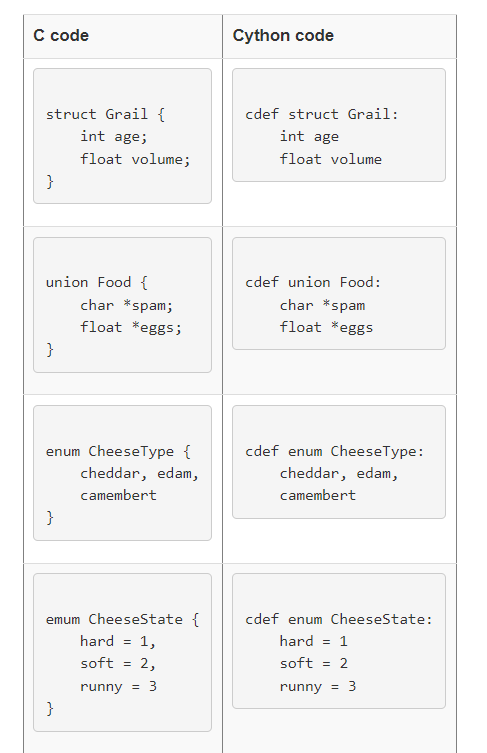

#### Functions

There are two kinds of function definition in Cython:

**Python functions**
- These are defined using the **_def_** statement, as in Python. They take Python objects as parameters and return Python objects.

**C functions**

- These are defined using the new **_cdef_** statement. They take either Python objects or C values as parameters, and can return either Python objects or C values.

### Using the magic `%%cython` in jupyter

In [1]:
import numpy as np

# sum non-negative integers 

a = 0
g = np.zeros((10, ))
for i in range(10):
    g[i] = a
    a += i
    
print(g)

[ 0.  0.  1.  3.  6. 10. 15. 21. 28. 36.]



- To enable support for Cython compilation, install Cython and load the Cython extension from within IPython:

In [ ]:
pip install Cython

In [3]:
%load_ext Cython


Cython code can be compiled using the `%%cython` cell magic command:

The **_cdef** statement is used to declare C variables, either local or module-level.


In [4]:
%%cython
import numpy as np

cdef int a = 0
cdef int g[10]
cdef int i

for i in range(10):
    g[i] = a
    a += i
    
print(g)

[0, 0, 1, 3, 6, 10, 15, 21, 28, 36]


It is also possible to see Cython’s code analysis using the `--annotate` option.

In [5]:
%%cython --annotate

cdef int a = 0
cdef int g[10]
cdef int i

for i in range(10):
    g[i] = a
    a += i
    
print(a)

45



- Each line can be expanded to show the generated C code  


- More yellow: ''more calls into the Python virtual machine''  


- More white: ''more non-Python C code''   


- ''more yellow lines'' means more calls into the virtual machine -- will not necessarily make the code slower 


- Each call into the virtual machine has a cost


- The cost of those calls will only be significant if the calls occur inside large loops  



In [6]:
%%cython --annotate

cdef struct Student:
    unsigned char *name
    unsigned char *lastname
    unsigned char *university_id
    int age
    float gpa
    
cdef Student student

student.name = 'John'
student.lastname = 'Smith'
student.university_id = 'js1234'
student.age = 20
student.gpa = 4.0

print("student:", student)

print("gpa:", student.gpa) 

student: {'name': b'John', 'lastname': b'Smith', 'university_id': b'js1234', 'age': 20, 'gpa': 4.0}
gpa: 4.0


----
## Performance Comparisons
The following pure Python example generates a list of kmax prime numbers. (Implementation of an algorithm to find prime numbers)

Prime number: 2, 3, 5, 7, 13, ...


In [7]:
# Pure Python code
import time

def primes_with_python(kmax):
    
    kmax = max(1000, kmax)
    primes = [None] * kmax # Initialize the list to the max number of elements
    
    result = []
    k = 0
    n = 2
    
    while k < kmax:
        
        i = 0
        while i < k and n % primes[i] != 0:
            i = i + 1
            
        if i == k:
            primes[k] = n
            k = k + 1
            result.append(n)
        
        n = n + 1
    return result

t = time.process_time()
x = primes_with_python(1000)
elapsed_time = time.process_time() - t
print(elapsed_time,'s')
%timeit x = primes_with_python(1000)

0.03125 s
39.1 ms ± 1.53 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


---

The same code can be run without any change in Cython.

---

In [8]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [9]:
%%cython --annotate
# Using the magic cython

import time

def primes_with_cython(kmax):
    kmax = max(1000, kmax)
    primes = [None] * kmax # Initialize the list to the max number of elements
    
    result = []
    k = 0
    n = 2
    while k < kmax:
        i = 0
        while i < k and n % primes[i] != 0:
            i = i + 1
        
        if i == k:
            primes[k] = n
            k = k + 1
            result.append(n)
        
        n = n + 1
    return result

t = time.process_time()
x = primes_with_cython(1000)
elapsed_time = time.process_time() - t
print(elapsed_time,'s')


0.015625 s


In [18]:
%timeit x = primes_with_cython(1000)

27.8 ms ± 609 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


---

We can define some types to improve the code:

In [19]:
%%cython --annotate
import time

def primes_ctype(int kmax):
    
    cdef int i, k, n
    cdef int primes[1000]
    
    kmax = max(1000, kmax)
    
    result = []
    k = 0
    n = 2
    while k < kmax:
        i = 0
        while i < k and n % primes[i] != 0:
            i = i + 1
            
        if i == k:
            primes[k] = n
            k = k + 1
            result.append(n)
        
        n = n + 1
    return result

t = time.process_time()
x = primes_ctype(1000)
elapsed_time = time.process_time() - t
print(elapsed_time,'s')

Content of stdout:
_cython_magic_28e02774ff1fc5cf5aecaad7c45797823c899039.c
   Creating library C:\Users\hagha\.ipython\cython\Users\hagha\.ipython\cython\_cython_magic_28e02774ff1fc5cf5aecaad7c45797823c899039.cp311-win_amd64.lib and object C:\Users\hagha\.ipython\cython\Users\hagha\.ipython\cython\_cython_magic_28e02774ff1fc5cf5aecaad7c45797823c899039.cp311-win_amd64.exp
Generating code
Finished generating code0.0 s


In [20]:
%timeit x = primes_ctype(1000)

1.69 ms ± 64.9 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)


----
### Using cython outside jupyter (Compiling with distutils)

See https://cython.readthedocs.io/en/latest/src/quickstart/build.html

- Cython code is normally saved in files ending with .pyx (the x indicates it is different from standard Python code). 


- A Cython file can be translated to C using the **distutils** package.

The **distutils** package is part of the standard library. It is the standard way of building Python packages, including native extension modules. 

The **distutils** package provides support for building and installing additional modules into a Python installation. 

The new modules may be either 100%-pure Python, or may be extension modules written in C, or may be collections of Python packages which include modules coded in both Python and C.

Most Python users will not want to use this module directly, but instead use the cross-version tools maintained by the Python Packaging Authority. In particular, **setuptools** is an enhanced alternative to **distutils**.

The following example configures the build for a Cython file called **my_module.pyx** with the following content:

```python
def cfunc(int n):
    cdef int s = 0
    cdef int i
    for i in range(n + 1):
        s += i
    return s
```

In [ ]:
Run this command in your system’s command shell:
!ls

In [ ]:
!cat my_module.pyx

---

In order to use **distutils** we have to create a **setup.py** script. In our example it can be:

```python
from distutils.core import setup
from Cython.Build import cythonize

setup(
    name = "my_module_app",
    ext_modules = cythonize("my_module.pyx"), 
)
```

---

In [ ]:
!cat setup.py

---

Now, run this command in your system’s command shell and you are done.



In [12]:
!python setup.py build_ext --inplace

# here the flag "inplace" is to: 
# ignore build-lib and put compiled extensions into the source directory alongside your pure Python modules

In [ ]:
!ls

---

The two files:
- my_module.c
- my_module.cpython-*.so
will be created

The .so library can be treated just like any Python module and imported using the normal import statement:
```python
import my_module
```

In [3]:
import sys # 
print(sys.path) #  list of directories that the interpreter will search in for the required module. 

['C:\\Users\\hagha\\Desktop\\NYU_2024\\Lecture\\05', 'C:\\ProgramData\\anaconda3\\python311.zip', 'C:\\ProgramData\\anaconda3\\DLLs', 'C:\\ProgramData\\anaconda3\\Lib', 'C:\\ProgramData\\anaconda3', '', 'C:\\Users\\hagha\\AppData\\Roaming\\Python\\Python311\\site-packages', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\win32\\lib', 'C:\\ProgramData\\anaconda3\\Lib\\site-packages\\Pythonwin']



- Cython also provides a means of importing Cython programs directly using the **pyximport** module. 
- To use pyximport, you must first import and initialize the module, then your programs will be able to use the import statement as you would normaly do for a Python module. 
- The pyxmodule is included with Cython.


In [4]:
#The pyximport module is loadeed and initialiazes as follows:
import pyximport
pyximport.install()

(None, <pyximport._pyximport3.PyxImportMetaFinder at 0x26c1e235dd0>)

In [5]:
import my_module

s = my_module.cfunc(100)
print("sum of the first 100 natural numbers:", s)

sum of the first 100 natural numbers: 4950


In [19]:
n = 2000
print("sum of the first %d natural numbers: %d" % (n, my_module.cfunc(n)))

sum of the first 2000 natural numbers: 1999000


## Other features

* Ensure C-only functions with `cdef`, mixed functions with `cpdef`
* Extension types: `cdef class`
* Better parallelism, with ability to disable the GIL https://cython.readthedocs.io/en/latest/src/userguide/parallelism.html
* Integration with NumPy (see part 2)
* etc. (see docs: https://cython.readthedocs.io/en/latest/index.html)